In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import logging
logging.basicConfig(format="%(message)s")


from dev import ESOINN
from dev.tests import UnitTest
from dev.commons import Plotter
from dev.samples import TrainingSamples
from dev.mock import load_input_signals
from dev.mock import Graph, Node, load_mock, save_mock

### Auto tests

In [2]:
test_nn = ESOINN.EnhancedSelfOrganizingIncrementalNN()
unit_test = UnitTest(test_nn)
res = unit_test.run_tests(1000)

0.63946017	for 1000 find_winners
0.00736770	for 1000 find_neighbors
0.75318469	for 1000 calc_threshold
0.01584896	for 1000 update_edges_age
0.10385901	for 1000 update_node_points
0.14082154	for 1000 update_node_density
0.06630121	for 1000 update_feature_vectors
0.01824884	for 1000 remove_old_ages
0.00340011	for 1000 calc_mean_density_in_subclass
0.01587334	for 1000 calc_alpha
0.15896305	for 1000 change_class_id
0.00642220	for 1000 combine_subclasses
0.05584599	for 1000 find_local_maxes
0.75841337	for 1000 remove_noise
0.65276685	for 1000 predict
0.09433132	for 1000 find_class_apex
4.78724188	for 1000 update


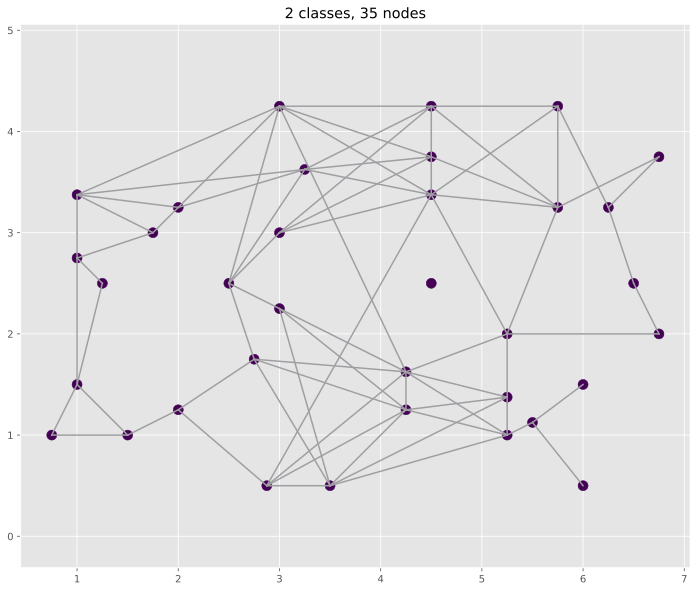

In [3]:
unit_test.display_info(plot=True)
# # test_nn.current_state()

### Manual tests

In [4]:
# TRACE = False
# SEPARATE_PLOTS = False
# PLOT_SIGNALS = True

# nn = ESOINN.EnhancedSelfOrganizingIncrementalNN(
#     init_nodes=[[1, 2], [5, 2]], logging_level="info", strong_condition=True, radius_cut_off=1
# )
# signals = load_input_signals()

# if PLOT_SIGNALS:
#     x, y = [], []
#     for signal in signals:
#         x.append(signal[0])
#         y.append(signal[1])
#     plt.scatter(x, y)
#     # plt.show()

# plotter = Plotter(nn)

# nn.fit(signals)
# plotter.display_info(plot=True, separate_show=SEPARATE_PLOTS, log=TRACE)

# # # test for predictions
# # nn.predict([3, 15])

# # # test for old edge removal
# # nn.edges[(0,1)] = 51
# # nn.remove_old_ages()
# # plotter.display_edges(log=True)

# # test for noize removal
# nn._remove_noise()
# if nn.current_state()['nodes']:
#     plotter.display_info(plot=True, separate_show=SEPARATE_PLOTS, log=TRACE)
# pass;

Sample size: 9000


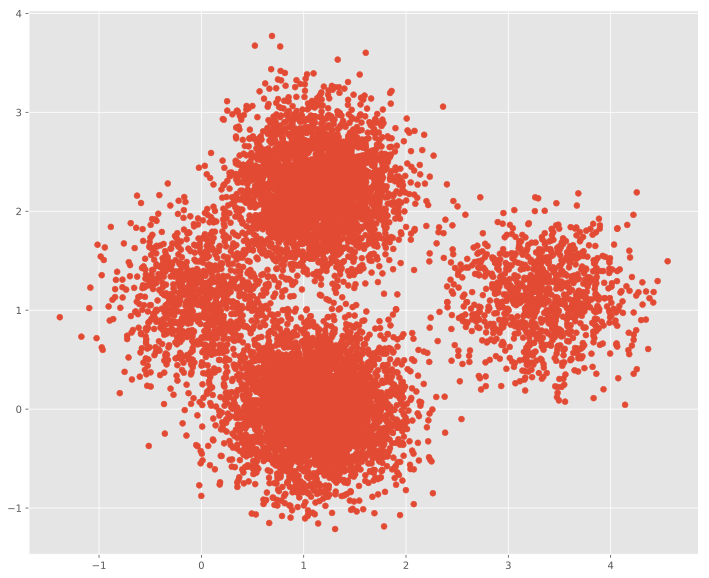

In [5]:
tsmpl = TrainingSamples(123)
samples = tsmpl.get_gauss_sample(count=4, bias=0.9, size=[1000, 3000, 4000, 1000], noise=0, 
                                 sigma=0.4, shuffle=True, classified=False)
# samples = tsmpl.get_beta_sample(count=3, bias=0.9, size=1000, noise=10, alpha=10, beta=10, scale=2.5, shuffle=True)
tsmpl.display_sample()

Training complete by 67.41247606277466


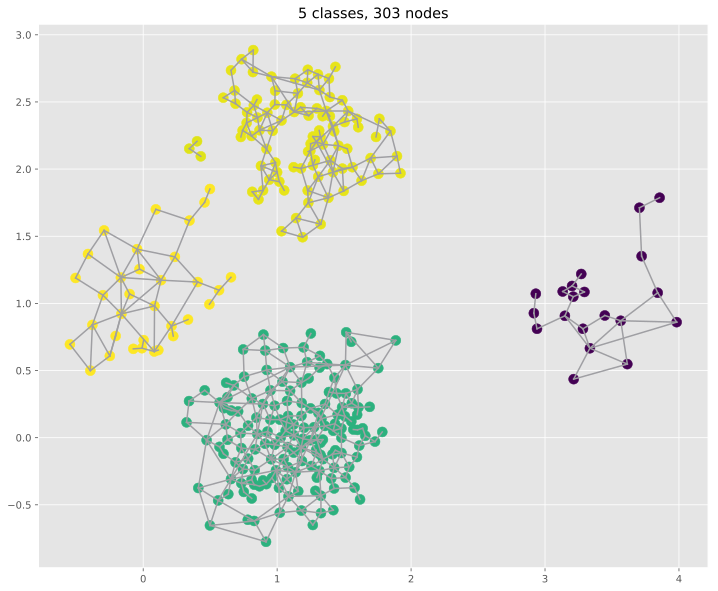

In [6]:
params = {
    'c1': 0.001,
    'c2': 1,
    'learning_step': 200,
    'max_age': 50, 
    'forget': False,
    'rc': 1,
    'mark_type': 1,  # 0, 2 - depreciated 
    'strong_condition': True,
    'global_points': False,
    'adaptive_noise_removal': True,
    'logging_level': "info", 
    'full_logging_info': False
}
nn = ESOINN.EnhancedSelfOrganizingIncrementalNN(**params)

plotter = Plotter(nn)

nn.fit(samples['samples'])
nn._remove_noise()
plotter.display_info(plot=True, separate_show=False, log=False)